<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
        <h1>STATISTIEK IN PYTHON 3: DATA VISUALISEREN (HISTOGRAM)</h1> 
    </font>
</div>

<div class="alert alert-block alert-success">
    In deze notebook leer je hoe je een histogram genereert met Python.
    </div>

### Importeer eerst de nodige modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In deze notebook zal je de dataset in het bestand `belgischebevolking2023leeftijd.csv` visueel voorstellen. Deze dataset bevat de Belgische bevolking ingedeeld volgens leeftijd. De data werden gedeeld door STATBEL [1].<br>
STATBEL beschouwt echter alle mensen van 100 en meer als '100-jarigen', terwijl de andere leeftijden voor elk leeftijdsjaar apart worden beschouwd. Daarom werd de groep van '100-jarigen' kunstmatig opgedeeld voor elke apart leeftijdsjaar vanaf 100 jaar t.e.m. 110 jaar, ermee rekening houdend dat de oudste Belg 110 jaar oud is [2].

<div>
    <font color=#690027 markdown="1">
        <h2>1. Dataset</h2> 
    </font>
</div>

### Opdracht 1.1

Laad de dataset in, verwijs ernaar met de variabele `bevolking` en geef ze weer op het scherm. De bestandsnaam is `belgischebevolking2023leeftijd.csv` en je vindt het bestand in de map `data`. 

In [2]:
# voorbeeldcode
bevolking = pd.read_csv("data/belgischebevolking2023leeftijd.csv")
bevolking

,leeftijd,aantal
0,0,114059
1,1,120071
2,2,116964
3,3,120787
4,4,122585
...,...,...
106,106,25
107,107,10
108,108,1
109,109,0


De steekproefvariabele is hier een **kwantitatieve** of **numerieke variabele**. 

### Opdracht 1.2

Stel deze data voor door de pandas-methode `bar()` te gebruiken. 

<AxesSubplot:xlabel='leeftijd'>

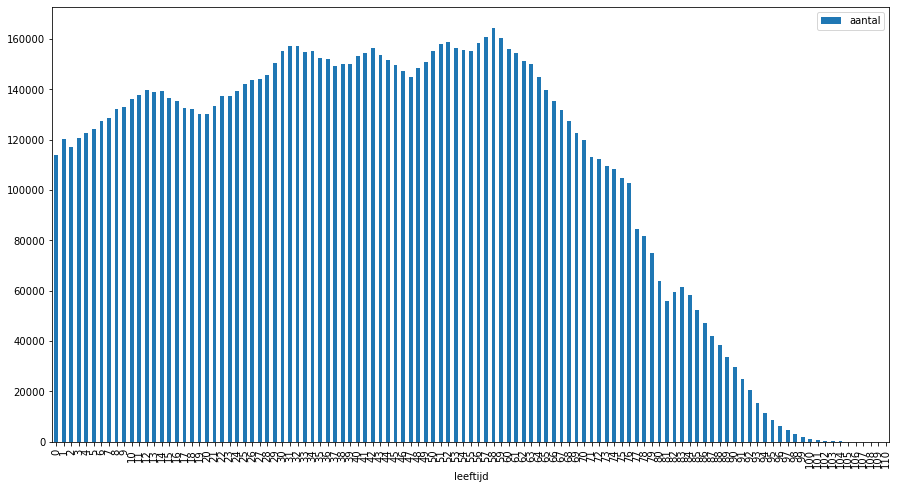

In [3]:
# voorbeeldcode
bevolking.plot.bar("leeftijd", "aantal", figsize=(15,8))

### Opdracht 1.3

Bereken de gemiddelde leeftijd van een Belg.

In [4]:
# voorbeeldcode

# totaal bevolkingsaantal
aantal = bevolking["aantal"]
aantal_Belgen = aantal.sum()

som_leeftijden = 0
for leeftijd in bevolking["leeftijd"]:
    som_leeftijden += leeftijd * bevolking["aantal"][leeftijd]
gemiddelde_leeftijd = som_leeftijden / aantal_Belgen

# uitvoer
print("Het totaal aantal Belgen is:", aantal_Belgen)
print("De gemidelde leeftijd van een Belg is:", gemiddelde_leeftijd)   

Het totaal aantal Belgen is: 11697557
De gemidelde leeftijd van een Belg is: 41.64365482467835


### Opdracht 1.4
- Bereken de kans dat een Belg tussen de 20 en 40 jaar oud is: $P(20<X<40)$.

In [5]:
# voorbeeldcode
aantal[20: 41]    

20    130323
21    133359
22    137434
23    137386
24    139215
25    142296
26    143685
27    144165
28    145524
29    150638
30    155361
31    157287
32    157207
33    154965
34    155090
35    152303
36    152081
37    149249
38    150196
39    150192
40    153114
Name: aantal, dtype: int64

In [6]:
# voorbeeldcode - Regel van Laplace
aantal_tussen20en40 = aantal[20: 41].sum()

print("De kans dat een Belg tussen de 20 en 40 jaar oud is, is:", aantal_tussen20en40 / aantal_Belgen)

De kans dat een Belg tussen de 20 en 40 jaar oud is, is: 0.26424919322897933


<div>
    <font color=#690027 markdown="1">
        <h2>2. Histogram</h2> 
    </font>
</div>

Om een goed zicht te krijgen hoe de verschillende **leeftijdscategorieën** vertegenwoordigd zijn in België, is het echter beter om deze data voor te stellen met een histogram.<br>
Je zal deze data op een overzichtelijke manier voorstellen in leeftijdsklassen per 10 jaar. (Door 10 jaar te kiezen als klassebreedte, wordt de kunstmatige opdeling tenietgedaan.)

<div class="alert alert-block alert-success">
Bij dit histogram zullen de leeftijdsklassen op de x-as komen en de relatieve frequentie op de y-as. Bovendien moet de <b>oppervlakte van elke staaf</b> gelijk zijn aan de <b>relatieve frequentie</b>.
    </div>

### Voorbeeld 2.1
Voer de volgende code-cel uit. Begrijp je de verschillende instructies?

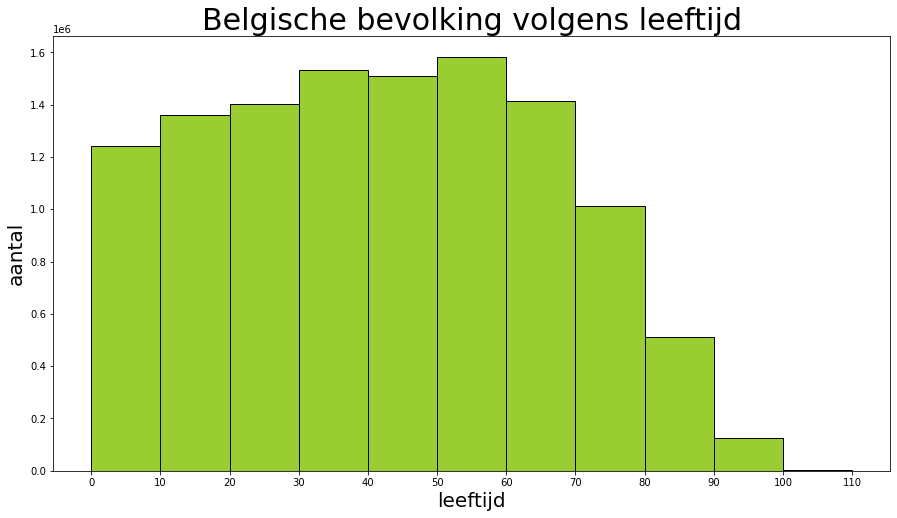

In [7]:
# histogram van de leeftijdsgroepen met absolute frequenties (m.b.v. matplotlib)

# klassenbreedte = 10

# intervallen
# bins = [min(bevolking["leeftijd"]) + i * klassenbreedte for i in range((max(bevolking["leeftijd"]) - min(bevolking["leeftijd"])) // klassebreedte + 2)]
klassengrenzen = np.arange(0, 111, 10)

# plot histogram
plt.figure(figsize=(15,8))

plt.hist(bevolking["leeftijd"], bins=klassengrenzen, weights=bevolking["aantal"], color="yellowgreen", edgecolor="black")

plt.xlabel("leeftijd", fontsize=20)
plt.ylabel("aantal", fontsize=20)
plt.title("Belgische bevolking volgens leeftijd", fontsize=30)

# plt.xticks(range(min(bevolking["leeftijd"]), max(bevolking["leeftijd"]) + klassebreedte, klassebreedte))
plt.xticks(klassengrenzen)

plt.show()


<Figure size 432x288 with 0 Axes>

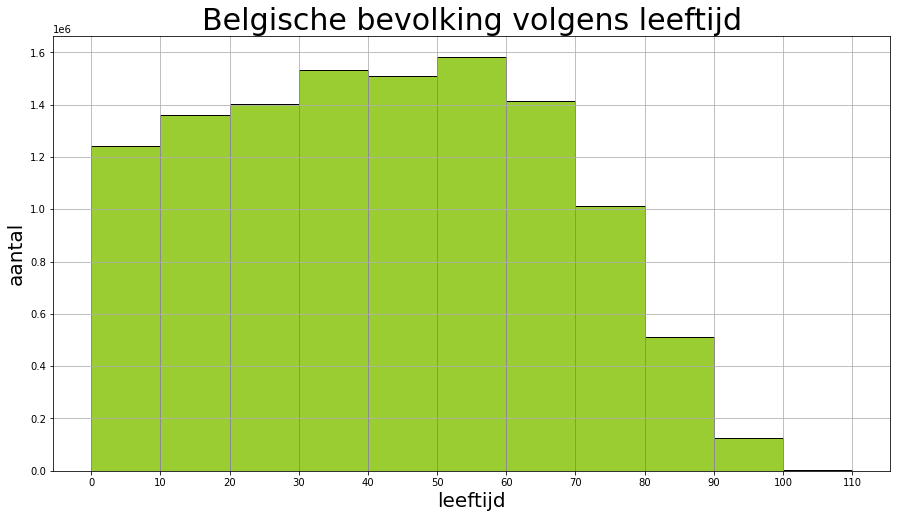

In [8]:
# histogram van de leeftijdsgroepen met absolute frequenties (m.b.v. pandas)

klassengrenzen = np.arange(0, 111, 10)

# plot histogram
plt.figure()

bevolking.hist("leeftijd", bins=klassengrenzen, weights=bevolking["aantal"], color="yellowgreen", edgecolor="black", figsize=(15,8))

plt.xlabel("leeftijd", fontsize=20)
plt.ylabel("aantal", fontsize=20)
plt.title("Belgische bevolking volgens leeftijd", fontsize=30)

plt.xticks(klassengrenzen)

plt.show()


Je kan nu al zien hoe zo'n histogram er ongeveer uitziet. Maar je moet de overstap nog maken naar de relatieve frequenties i.p.v. de absolute.

Je hebt hier eigenlijk te maken met een kenmerk van elk individu van de Belgische bevolking: de leeftijdsklasse. En van die leeftijdsklasse ga je na hoe groot het deel van de bevolking is dat tot die leeftijdsklasse behoort. 

### Voorbeeld 2.2

Voor een histogram werk je met de relatieve frequenties i.p.v. de absolute frequenties.<br>
Je houdt bovendien rekening met de breedte van de intervallen, opdat de oppervlakte van elke staaf zou overeenkomen met de relatieve frequentie. Hier is de klassebreedte 10. 

Je moet dus de absolute frequenties omzetten naar relatieve frequenties en vervolgens die relatieve frequenties delen door 10.

Voer daartoe volgende code-cellen uit.

In [10]:
# kolom met relatieve frequenties toevoegen aan het data frame
bevolking["RF"] = bevolking["aantal"] / aantal_Belgen /10
bevolking

,leeftijd,aantal,RF
0,0,114059,9.750668e-04
1,1,120071,1.026462e-03
2,2,116964,9.999011e-04
3,3,120787,1.032583e-03
4,4,122585,1.047954e-03
...,...,...,...
106,106,25,2.137198e-07
107,107,10,8.548794e-08
108,108,1,8.548794e-09
109,109,0,0.000000e+00


<Figure size 432x288 with 0 Axes>

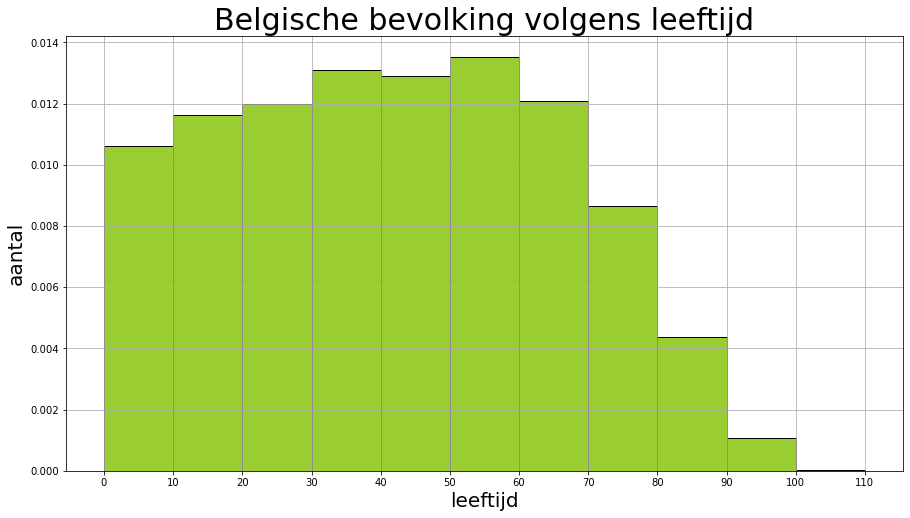

In [11]:
# histogram van de leeftijdsgroepen met relatieve frequenties (m.b.v. pandas)

klassengrenzen = np.arange(0, 111, 10)

# plot histogram
plt.figure()

bevolking.hist("leeftijd", bins=klassengrenzen, weights=bevolking["RF"], color="yellowgreen", edgecolor="black", figsize=(15,8))

plt.xlabel("leeftijd", fontsize=20)
plt.ylabel("aantal", fontsize=20)
plt.title("Belgische bevolking volgens leeftijd", fontsize=30)

plt.xticks(klassengrenzen)

plt.show()

<div>
    <font color=#690027 markdown="1">
        <h2>3. Extra: Berekenen van de totale oppervlakte van de staven</h2> 
    </font>
</div>

De totale oppervlakte van de staven zou 1 moeten zijn. Controleer dit met Python. 

In [12]:
# voorbeeldcode
som_oppervlaktes = bevolking["RF"].sum() * 10
print(som_oppervlaktes)

0.9999999999999999


Deze som is eigenlijk 1, maar hier heb je te maken met een afrondingsfout. 

<div class="alert alert-block alert-warning">
De leeftijden zijn duidelijk niet verdeeld volgens een normale verdeling. Je leert meer over de normale verdeling in een volgende notebook.
</div>     

### Referentielijst

[1] Bevolking naar geslacht en leeftijdsgroep - België, laatste jaar. https://bestat.statbel.fgov.be/bestat/crosstable.xhtml?view=5fee32f5-29b0-40df-9fb9-af43d1ac9032<br>
[2] vrt. *Oudste Belg Marcelle Lévaz op 111-jarige leeftijd overleden*. https://www.vrt.be/vrtnws/nl/2022/11/14/oudste-belg-marcelle-levaz-op-111-jarige-leeftijd-overleden/

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>

Notebook python in wiskunde - Statistiek, van F. wyffels & N. Gesquière in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>.